**Connect Colab with Goolge Drive**  
`/content/gdrive` is the default path to connect with gdrive, do not change  
**Every thing in your drive (root) is under `/content/gdrive/My Drive/`**  

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Import PyTorch library**  
`torch` &rarr; basic library  
`torch.nn` &rarr; includes all layers (CNN,RNN ...) and loss functions(L1,L2,CrossEntropy ...)  
`torch.optim` &rarr; includes all optimize function (SGD,Adam,RMSprop ...)  
`matplotlib.pyplot` &rarr; just for visualization, you should know it ...

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

**Create Data**  
we create a simple data in order to go through the worflow.  
100 data, each data has one element, so the shape is (100,1)




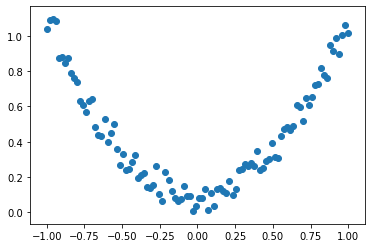

In [0]:
x = torch.linspace(-1, 1, 100) # shape(100)
x = torch.unsqueeze(x, dim=1) # shape(100,1) 
y = x.pow(2) + 0.2*torch.rand(x.size()) # shape(100,1)

plt.scatter(x.numpy(), y.numpy())
plt.show()

**Build Model**  
In this part, you need to complete the model based on this template.  
`torch.nn.Module` &rarr; Base class for all neural network modules, all model should **subclass** this class.  

**Please implement a model with this workflow:**  
input &rarr; FCN &rarr; ReLU &rarr; FCN &rarr; output  
※FCN = fully connected layer/Dense layer/Linear layer.  

You may take [PyTorch doc](https://pytorch.org/docs/stable/nn.html) as a reference.  

In [0]:
class Net(nn.Module):
  def __init__(self, n_feature):
    super(Net, self).__init__()
    """
    Initializes internal Module state.
    Declare the layers and variable you need.
    """
    # n_feature: the output feature size of first FCN
    # TODO
  def forward(self, x):
    """
    Defines the computation performed at every call.
    Should be overridden by all subclasses.
    
    x (batch,n_feature): batch data
    return (batch, 1): batch of prediction 
    """
    # TODO


      
net = Net(n_feature=20)

**Setting Loss Function & Optimizer**  
net.parameters() indicates  all parameters in **net**.  
We input all parameters into optimizer, which means all parameters must be updated.  


In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.2) 
criteria = nn.MSELoss()

**Transfer data and model into GPU**  
All computation will run in cpu by default, we needs to move model and data into gpu if wants to accelerate by GPU.  
Here are two common ways to achieve.    
`.cuda()` / `.cpu()`  
`.to('cuda')` / `.to('cpu')`

In [0]:
#  I prefer this method, which makes you change mode easily 
device = 'cuda'
net = net.to(device)
x = x.to(device)
y = y.to(device)

**Training**  

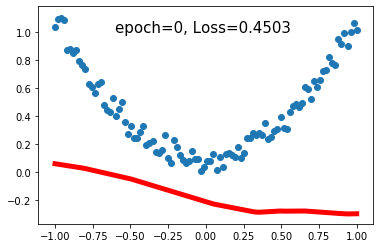

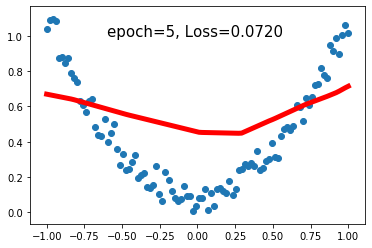

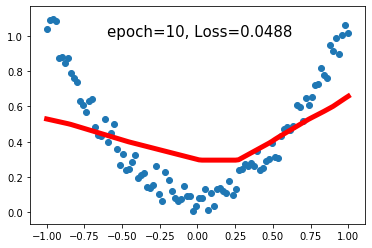

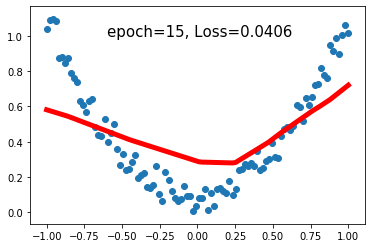

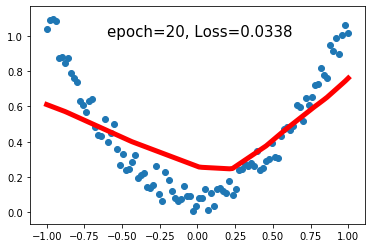

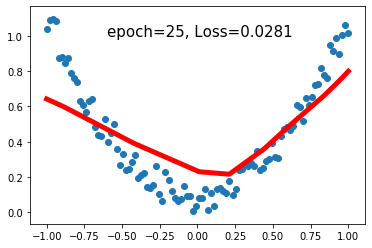

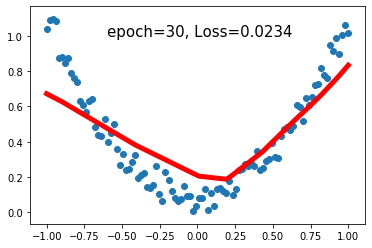

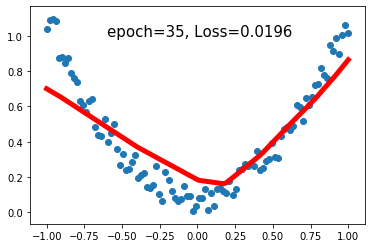

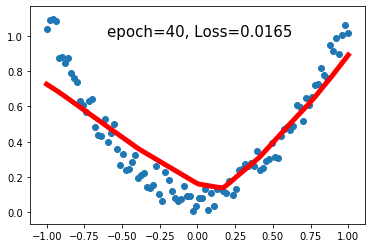

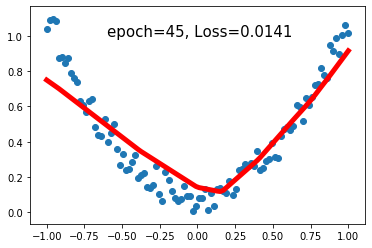

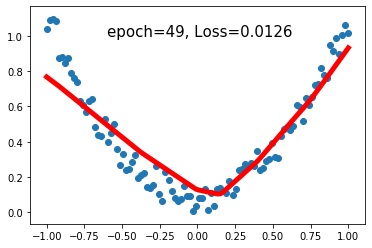

In [0]:
net.train(True) # Tell model we're going to train
for t in range(50):
  optimizer.zero_grad() # Sets gradients of all optimized parameters to zero, avoid .
  prediction = net(x)
  loss = criteria(prediction, y) # Computes loss.
  
  loss.backward() # Computes gradients.
  
  optimizer.step() # Updates  all optimized parameters according to gradients
  
  if (t % 5 == 0) or (t==49):
    #  net.state_dict() return model weights
    torch.save(net.state_dict(), '/content/gdrive/My Drive/Colab Notebooks/{}.pt'.format(t))
    
    # for visualization (optional)
    plt.cla()
    plt.scatter(x.cpu().numpy(), y.cpu().numpy())
    plt.plot(x.cpu().numpy(), prediction.cpu().detach().numpy(), 'r-', lw=5)
    plt.text(-0.6, 1, 'epoch={}, Loss={:.4f}'.format(t, loss.cpu().detach().numpy()), fontdict={'size': 15, 'color':  'black'})
    plt.pause(0.1)

In [0]:
# Load your best weight based on your loss and accurancy.
# net.load_state_dict(torch.load('/content/gdrive/My Drive/Colab Notebooks/25.pt'))

**Predict**  

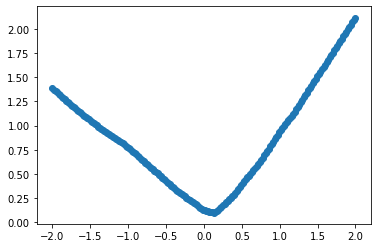

In [0]:
net.train(False) # Tell model we're not training
x_pred = torch.unsqueeze(torch.linspace(-2, 2, 200), dim=1)
x_pred = x_pred.to(device)
with torch.no_grad(): # disabled gradient calculation which will reduce memory consumption.
  y_pred = net(x_pred)
plt.scatter(x_pred.cpu().numpy(), y_pred.cpu().numpy())